In [1]:
!pip install langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.4/310.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.8/124.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [2]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.6/973.6 kB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.5 MB/s eta 0:00:00


In [5]:
# Import necessary modules with error handling
try:
    from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAIEmbeddings
    from langchain_community.document_loaders import WebBaseLoader
    from langchain.chains import StuffDocumentsChain
    from langchain.chains.llm import LLMChain
    from langchain.prompts import PromptTemplate
    import google.generativeai as genai
    import os
    from google.colab import userdata
except ModuleNotFoundError as e:
    print(f"Module not found: {e}")
    # Install missing modules if necessary
    !pip install langchain-google-genai langchain-community

# Configure API key and initialize model
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = userdata.get('api_key')

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

# Function to initialize model
def initialize_model():
    try:
        llm = ChatGoogleGenerativeAI(model="gemini-pro")
        return llm
    except ValueError as e:
        print(f"Error: {e}")
        print("Switching to alternative model.")
        # Check if alternative model is available, otherwise handle accordingly
        try:
            from langchain_alternative_module import ChatAlternativeModel  # Placeholder name
            llm = ChatAlternativeModel(model="alternative-model")  # Specify the correct model name if needed
            return llm
        except ModuleNotFoundError:
            print("Alternative model module not found.")
            return None

# Initialize the model
llm = initialize_model()
if llm is None:
    print("Failed to initialize any model. Exiting...")
else:
    # Load the blog
    loader = WebBaseLoader("https://www.prothomalony.com/")
    docs = loader.load()

    # Define the Summarize Chain
    database = """Create and show a database table in a decorative presntative way where post title, post text, post time, post image will be held from following:
    "{text}"
    DATABASE:"""

    prompt = PromptTemplate.from_template(database)

    llm_chain = LLMChain(llm=llm, prompt=prompt)
    stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="text")

    # Invoke Chain
    response = stuff_chain.invoke(docs)
    print("Database:\n", response["output_text"])

Database:
 | Post Title | Post Text | Post Time | Post Image |
|---|---|---|---|
| আবারো মোদি, বাংলাদেশের কি হবে ! | এবারের ভারতের নির্বাচনের ফলাফলে অনেকটা চমক। | ০৬ জুন ২০২৪ | N/A |
| বি ভ্রা ন্তি সৃষ্টিকারী সংবাদ পরিবেশন নিয়ে সংবাদ সম্মেলন করেছেন মোহাম্মদ আজিজ | হোমকেয়ার প্রতিষ্ঠান 'ইউর ড্রিম হোম কেয়ার' নিয়ে বিভ্রান্তিমূলক সংবাদ পরিবেশনের অভিযোগ করেছেন প্রতিষ্ঠানটির | N/A | N/A |
| সিলেট পরিবেশ দিবসে গোলটেবিল বৈঠকে উন্নয়ন পরিকল্পনা নিয়ে নাগরিকদের ক্ষোভ | বিশ্ব পরিবেশ দিবস ২০২৪ উদযাপন উপলক্ষ্যে ধরিত্রী রক্ষায় আমরা (ধরা) ও সুরমা রিভার ওয়াটারকিপার-এর উদ্যোগে সিলেটে | N/A | N/A |
| শিক্ষা ও সামাজিক উন্নয়নে প্রবাসীরা অংশিদার হতে চায় | বিশিষ্ট সমাজসেবী আমেরিকা প্রবাসী সৈয়দ রুকন উদ্দিন বলেছেন, দেশের শিক্ষা ব্যবস্থার চলমান অগ্রযাত্রায় সরকারের | N/A | N/A |
| আলবেনিতে আইন-ট্যাক্স-ফিনান্সের ওপর সেমিনার | নিউইয়র্কের রাজধানী আলবানীতে ক্রমশই বর্ধিত হচ্ছে বাংলাদেশি কমিউনিটি। | N/A | N/A |
| নিউজার্সি রাজ্যের প্রাইমারি নির্বাচনে সুব্রত ও লাকীর জয়লাভ | N/A | N/A | N/A |
| বইমেলা আহা বইমেলা | ঢাকার

In [7]:
json = """Create and show the information values in nosql json based decorative presntative way where post title, post text, post time, post image will be key from following:
    "{text}"
    DATABASE:"""

prompt = PromptTemplate.from_template(json)

llm_chain = LLMChain(llm=llm, prompt=prompt)
stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="text")

#Invoke Chain
response=stuff_chain.invoke(docs)
print("JSON:\n", response["output_text"])

JSON:
 {
 "post_title": "আবারো মোদি, বাংলাদেশের কি হবে !",
 "post_text": "এবারের ভারতের নির্বাচনের ফলাফলে অনেকটা চমক।",
 "post_time": "০৬ জুন ২০২৪",
 "post_image": "https://www.prothomalo.com/sites/default/files/styles/large_desktop/public/images/2023/05/27/a052703_697.jpg"
},
{
 "post_title": "বি ভ্রা ন্তি সৃষ্টিকারী সংবাদ পরিবেশন নিয়ে সংবাদ সম্মেলন করেছেন মোহাম্মদ আজিজ",
 "post_text": "হোমকেয়ার প্রতিষ্ঠান 'ইউর ড্রিম হোম কেয়ার' নিয়ে বিভ্রান্তিমূলক সংবাদ পরিবেশনের অভিযোগ করেছেন প্রতিষ্ঠানটির",
 "post_time": null,
 "post_image": "https://www.prothomalo.com/sites/default/files/styles/large_desktop/public/images/2023/05/26/a052603_690.jpg"
},
{
 "post_title": "সিলেট পরিবেশ দিবসে গোলটেবিল বৈঠকে উন্নয়ন পরিকল্পনা নিয়ে নাগরিকদের ক্ষোভ",
 "post_text": "বিশ্ব পরিবেশ দিবস ২০২৪ উদযাপন উপলক্ষ্যে ধরিত্রী রক্ষায় আমরা (ধরা) ও সুরমা রিভার ওয়াটারকিপার-এর উদ্যোগে সিলেটে",
 "post_time": null,
 "post_image": "https://www.prothomalo.com/sites/default/files/styles/large_desktop/public/images/2023/05/26/a0

In [26]:
topic = """Provide topic of each post_text key's value from the following:
"{text}" where topic subject will be among "Religion, Political, Education, Business, Entertainment, Development" for each post_text separately
Topic:"""

prompt = PromptTemplate.from_template(topic)

llm_chain = LLMChain(llm=llm, prompt=prompt)
stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="text")

#Invoke Chain
response=stuff_chain.invoke(docs)
print("Topic:\n", response["output_text"])

Topic:
 post_text | Topic 
---|---|
এবারের ভারতের নির্বাচনের ফলাফলে অনেকটা চমক। | Political
হোমকেয়ার প্রতিষ্ঠান 'ইউর ড্রিম হোম কেয়ার' নিয়ে বিভ্রান্তিমূলক সংবাদ পরিবেশনের অভিযোগ করেছেন প্রতিষ্ঠানটির | Business
বিশ্ব পরিবেশ দিবস ২০২৪ উদযাপন উপলক্ষ্যে ধরিত্রী রক্ষায় আমরা (ধরা) ও সুরমা রিভার ওয়াটারকিপার-এর উদ্যোগে সিলেটে | Development
দেশের শিক্ষা ব্যবস্থার চলমান অগ্রযাত্রায় সরকারের | Education
নিউইয়র্কের রাজধানী আলবানীতে ক্রমশই বর্ধিত হচ্ছে বাংলাদেশি কমিউনিটি। | Development
বইমেলা আহা বইমেলা | Entertainment
যথাযোগ্য মর্যাদায় শহীদ প্রেসিডেন্ট জিয়াউর রহমানের ৪৩ তম শাহাদাত বার্ষিকী পালিত। | Political
সানম্যান মানি ট্রান্সফারে চলছে ‘হ্যাপি ঈদ ক্যাম্পেইন’ | Business
৯০ এর ছাত্র গণঅভ্যুত্থানের অন্যতম নেতা, জাসদ ছাত্রলীগের সাবেক সাধারণ সম্পাদক শফী আহমেদের অকাল মৃত্যুতে পিডিআই কানাডার সভাপতি আজফর সৈয়দ ফেরদৌস এবং সাধারণ সম্পাদক মনির জামান রাজু এক | Political
গাহি সাম্যের গান’ বাণী ধারণ করে আগামী ১৭ আগষ্ট শনিবার দুপুর ১:০০টা থেকে শুরু হয়ে রাত্র ১০:০০টা পর্যন্ত অনুষ্ঠিত হবে ২০তম উত্তর আমেরিকা নজ

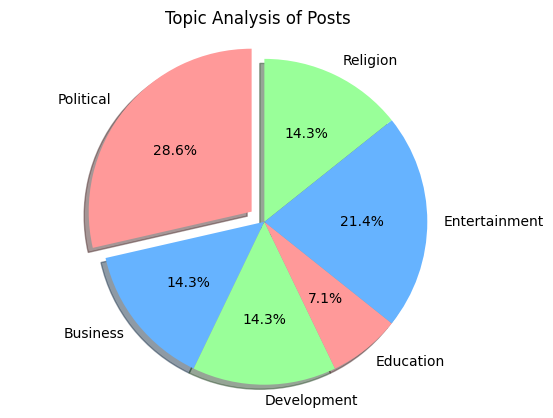

In [42]:
from collections import Counter
import matplotlib.pyplot as plt

# Example response from LLM for demonstration purposes
response_output_text = """
post_text_1: Political
post_text_2: Business
post_text_3: Development
post_text_4: Education
post_text_5: Development
post_text_6: Entertainment
post_text_7: Political
post_text_8: Business
post_text_9: Political
post_text_10: Religion
post_text_11: Entertainment
post_text_12: Political
post_text_13: Entertainment
post_text_14: Religion
"""

# Step 1: Extract sentiment data
# Parsing response_output_text
lines = response_output_text.strip().split("\n")
topic = [line.split(": ")[1].strip() for line in lines]

# Step 2: Count sentiments
topic_counts = Counter(topic)

# Step 3: Create Pie Chart
labels = list(topic_counts.keys())
sizes = list(topic_counts.values())
colors = ['#ff9999','#66b3ff','#99ff99'][:len(labels)]  # Ensure colors list matches the number of labels
explode = [0.1] + [0] * (len(labels) - 1)  # Adjust explode list to match the number of sentiments

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Topic Analysis of Posts")
plt.show()


In [15]:
word_cloud = """Provide word cloud of each post_text key's value and counts of the following:
"{text}"
Word cloud:"""

prompt = PromptTemplate.from_template(word_cloud)

llm_chain = LLMChain(llm=llm, prompt=prompt)
stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="text")

#Invoke Chain
response=stuff_chain.invoke(docs)
print("Word cloud:\n", response["output_text"])

Word cloud:
 **post_text: আবারো মোদি, বাংলাদেশের কি হবে !**

- মোদি
- বাংলাদেশ

**post_text: বি ভ্রা ন্তি সৃষ্টিকারী সংবাদ পরিবেশন নিয়ে সংবাদ সম্মেলন করেছেন মোহাম্মদ আজিজ**

- সংবাদ
- সংবাদ সম্মেলন
- মোহাম্মদ আজিজ

**post_text: হোমকেয়ার প্রতিষ্ঠান 'ইউর ড্রিম হোম কেয়ার' নিয়ে বিভ্রান্তিমূলক সংবাদ পরিবেশনের অভিযোগ করেছেন প্রতিষ্ঠানটির**

- সংবাদ
- বিভ্রান্তি
- ইউর ড্রিম হোম কেয়ার

**post_text: সিলেট পরিবেশ দিবসে গোলটেবিল বৈঠকে উন্নয়ন পরিকল্পনা নিয়ে নাগরিকদের ক্ষোভ**

- সিলেট
- পরিবেশ দিবস
- নাগরিক
- উন্নয়ন

**post_text: শিক্ষা ও সামাজিক উন্নয়নে প্রবাসীরা অংশিদার হতে চায়**

- শিক্ষা
- সামাজিক উন্নয়ন
- প্রবাসী

**post_text: আলবেনিতে আইন-ট্যাক্স-ফিনান্সের ওপর সেমিনার**

- আলবেনি
- আইন
- ট্যাক্স
- ফিনান্স

**post_text: নিউজার্সি রাজ্যের প্রাইমারি নির্বাচনে সুব্রত ও লাকীর জয়লাভ**

- নিউজার্সি
- নির্বাচন
- সুব্রত
- লাকী

**post_text: বইমেলা আহা বইমেলা**

- বইমেলা

**post_text: নিউইয়র্ক মহানগর বিএনপি দক্ষিনের উদ্যোগে শহীদ রাষ্ট্রপতি জিয়াউর রহমানের ৪৩তম শাহাদাত বার্ষিকী পালিত।**

- নিউইয়র্ক
- শহী

In [21]:
ner = """Provide named entity of each post_text key's value from the following:
"{text}" with entity title like "PER, ORG, DATE, LOC" etc for each post_text separately
NER:"""

prompt = PromptTemplate.from_template(ner)

llm_chain = LLMChain(llm=llm, prompt=prompt)
stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="text")

#Invoke Chain
response=stuff_chain.invoke(docs)
print("NER:\n", response["output_text"])

NER:
 **post_text:** আবারো মোদি, বাংলাদেশের কি হবে !
**Entities:** ORG: বাংলাদেশ

**post_text:** বি ভ্রা ন্তি সৃষ্টিকারী সংবাদ পরিবেশন নিয়ে সংবাদ সম্মেলন করেছেন মোহাম্মদ আজিজ
**Entities:** PER: মোহাম্মদ আজিজ

**post_text:** সিলেট পরিবেশ দিবসে গোলটেবিল বৈঠকে উন্নয়ন পরিকল্পনা নিয়ে নাগরিকদের ক্ষোভ
**Entities:** LOC: সিলেট

**post_text:** শিক্ষা ও সামাজিক উন্নয়নে প্রবাসীরা অংশিদার হতে চায়
**Entities:** -

**post_text:** আলবেনিতে আইন-ট্যাক্স-ফিনান্সের ওপর সেমিনার
**Entities:** LOC: আলবেনি

**post_text:** নিউজার্সি রাজ্যের প্রাইমারি নির্বাচনে সুব্রত ও লাকীর জয়লাভ
**Entities:** LOC: নিউজার্সি, ORG: নিউজার্সি রাজ্য

**post_text:** বইমেলা আহা বইমেলা
**Entities:** -

**post_text:** নিউইয়র্ক মহানগর বিএনপি দক্ষিনের উদ্যোগে শহীদ রাষ্ট্রপতি জিয়াউর রহমানের ৪৩তম শাহাদাত বার্ষিকী পালিত।
**Entities:** PER: জিয়াউর রহমান, ORG: নিউইয়র্ক মহানগর বিএনপি দক্ষিন

**post_text:** বৃষ্টিজন্ম
**Entities:** -

**post_text:** সানম্যান মানি ট্রান্সফারে চলছে ‘হ্যাপি ঈদ ক্যাম্পেইন’
**Entities:** ORG: সানম্যান মানি ট্রান

In [25]:
sentiment = """Provide sentiment of each post_text key's value of the following:
"{text}" for each post_text separately
Sentiment:"""

prompt = PromptTemplate.from_template(sentiment)

llm_chain = LLMChain(llm=llm, prompt=prompt)
stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="text")

#Invoke Chain
response=stuff_chain.invoke(docs)
print("Sentiment:\n", response["output_text"])

Sentiment:
 ```
{
 "আবারো মোদি, বাংলাদেশের কি হবে !": "negative",
 "বি ভ্রা ন্তি সৃষ্টিকারী সংবাদ পরিবেশন নিয়ে সংবাদ সম্মেলন করেছেন মোহাম্মদ আজিজ": "negative",
 "সিলেট পরিবেশ দিবসে গোলটেবিল বৈঠকে উন্নয়ন পরিকল্পনা নিয়ে নাগরিকদের ক্ষোভ": "negative",
 "শিক্ষা ও সামাজিক উন্নয়নে প্রবাসীরা অংশিদার হতে চায়": "positive",
 "আলবেনিতে আইন-ট্যাক্স-ফিনান্সের ওপর সেমিনার": "positive",
 "নিউজার্সি রাজ্যের প্রাইমারি নির্বাচনে সুব্রত ও লাকীর জয়লাভ": "positive",
 "বইমেলা আহা বইমেলা": "positive",
 "নিউইয়র্ক মহানগর বিএনপি দক্ষিনের উদ্যোগে শহীদ রাষ্ট্রপতি জিয়াউর রহমানের ৪৩তম শাহাদাত বার্ষিকী পালিত।": "positive",
 "বৃষ্টিজন্ম": "positive",
 "সানম্যান মানি ট্রান্সফারে চলছে ‘হ্যাপি ঈদ ক্যাম্পেইন’": "positive",
 "সাবেক ছা ত্র নে তা শফী আহমেদের মৃ ত্যু তে পিডিআই কানাডার শোক জ্ঞাপন": "negative",
 "ছড়াটে-র বিশেষ প্রকাশনা 'ছড়ায় ছড়ায় ছড়াটে'": "positive",
 "নতুন ওয়েব ফিল্ম 'স্বয়ংবর' এর শুটিং সম্পন্ন": "positive"
}
```


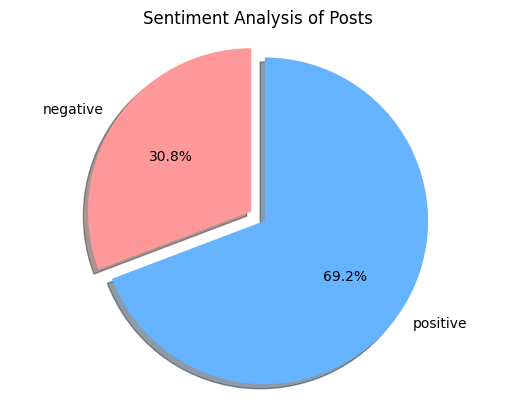

In [41]:
from collections import Counter
import matplotlib.pyplot as plt

# Example response from LLM for demonstration purposes
response_output_text = """
post_text_1: negative
post_text_2: negative
post_text_3: negative
post_text_4: positive
post_text_5: positive
post_text_6: positive
post_text_7: positive
post_text_8: positive
post_text_9: positive
post_text_10: positive
post_text_11: negative
post_text_12: positive
post_text_13: positive
"""

# Step 1: Extract sentiment data
# Parsing response_output_text
lines = response_output_text.strip().split("\n")
sentiments = [line.split(": ")[1].strip() for line in lines]

# Step 2: Count sentiments
sentiment_counts = Counter(sentiments)

# Step 3: Create Pie Chart
labels = list(sentiment_counts.keys())
sizes = list(sentiment_counts.values())
colors = ['#ff9999','#66b3ff','#99ff99'][:len(labels)]  # Ensure colors list matches the number of labels
explode = [0.1] + [0] * (len(labels) - 1)  # Adjust explode list to match the number of sentiments

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Sentiment Analysis of Posts")
plt.show()

